In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [111]:
raw_industrial = pd.read_excel(r'OECD_Industrial.xlsx', index_col=0)
raw_industrial.index = pd.to_datetime(raw_industrial.index)

raw_industrial.isna().sum() 

Value    0
dtype: int64

In [302]:
industrial = raw_industrial['2014':]
insample = industrial['2017':'2022-07']
outsample = industrial['2022-08':]

<AxesSubplot: xlabel='TIME'>

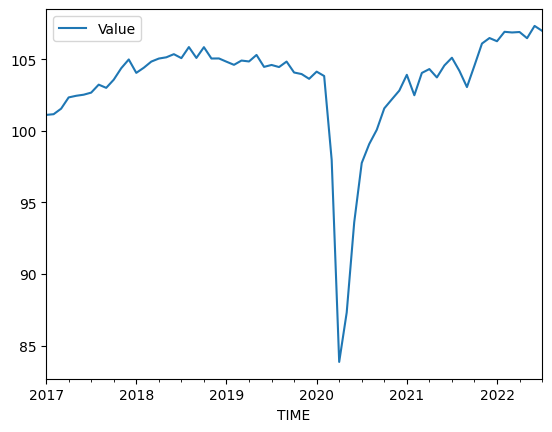

In [208]:
insample.plot()

In [113]:
def zscore(s, window, thresh=3, return_all=True):
    roll = s.rolling(window=window, min_periods=1, center=True)
    avg = roll.mean()
    std = roll.std(ddof=1)
    z = s.sub(avg).div(std)   
    m = z.between(-thresh, thresh)
    
    if return_all:
        return z, avg, std, m
    return s.where(m, avg)

In [249]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import STL
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.pyplot as plt

def remove_outliers(df_in, col_name):
        df_out = df_in.copy()
        q1 = df_out[col_name].quantile(0.25)
        q3 = df_out[col_name].quantile(0.75)
        iqr = q3 -q1
        fence_low  = q1 -1.5 *iqr
        fence_high = q3 +1.5 *iqr
        
        df_out[col_name] = np.where((df_out[col_name] < fence_low) | (df_out[col_name] > fence_high), np.nan, df_out[col_name])
        outliers = df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
        
        return df_out, outliers


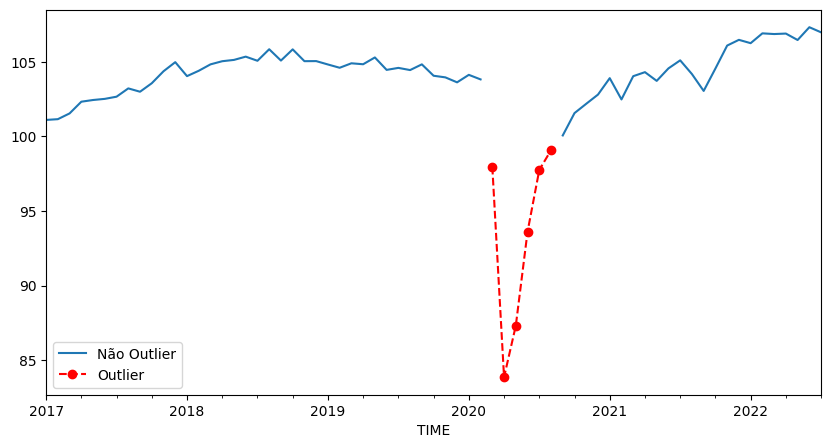

In [303]:
outliers, out = remove_outliers(insample, 'Value')
fig, ax = plt.subplots(figsize=(10,5))
outliers.plot(ax=ax)
out.plot(linestyle="--",marker="o", color='red', ax=ax, legend='Outlier')
plt.legend(["Não Outlier", "Outlier"])

<AxesSubplot: xlabel='TIME'>

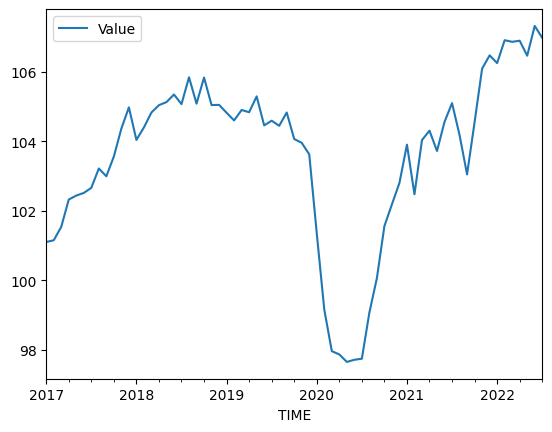

<AxesSubplot: xlabel='TIME'>

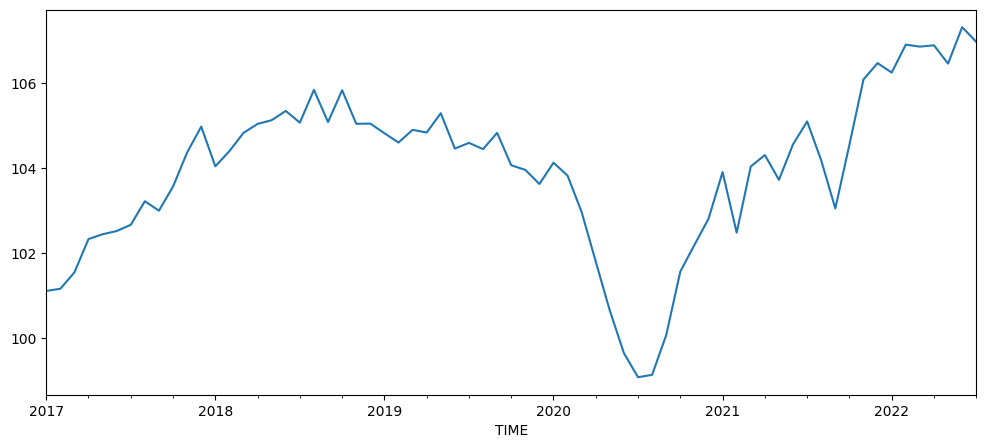

In [305]:

industrialInterpolated =  outliers['Value'].interpolate(method='cubic', limit_direction='both')

industrialInterpolated.plot(figsize=(12,5))
# industrialInterpolated.to_excel('OECDInterpolated.xlsx')

<AxesSubplot: xlabel='TIME'>

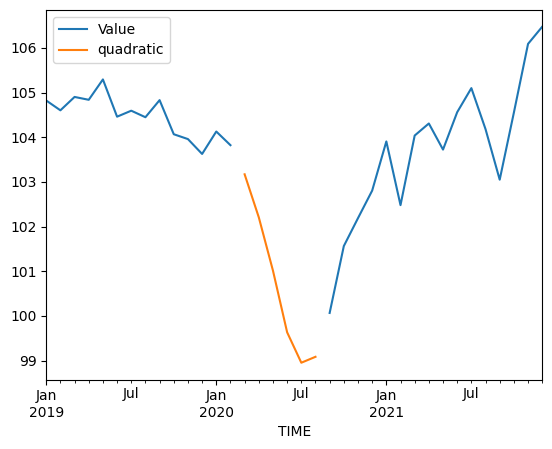

In [277]:
# outliers['Nearest'] = outliers['Value'].interpolate(method='nearest', limit_direction='both')
# outliers['Linear'] = outliers['Value'].interpolate(method='linear', limit_direction='both')
# outliers['cubic'] = outliers['Value'].interpolate(method='cubic', limit_direction='both')
outliers['quadratic'] = outliers['Value'].interpolate(method='quadratic', limit_direction='both')

# outliers['polynomial'] = outliers['Value'].interpolate(method='polynomial', order=5,limit_direction='both')
# outliers['barycentric'] = outliers['Value'].interpolate(method='barycentric')
# outliers['akima'] = outliers['Value'].interpolate(method='akima')

mask = ~outliers['Value'].isnull()
outliers.loc[mask, outliers.columns.difference(['Value'])] = np.nan

outliers['2019':'2021'].plot()